In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/BTC_BOGMAS_Nov14-Jun23.csv")


In [3]:
df.head()

,Date,BOGMAS,BTC-USD,BOGMAS_Chg%,BTC-USD_Chg%
0,01/11/2014,3830400,378.046997,-0.042759,0.117421
1,01/12/2014,3934500,320.192993,0.027177,-0.153034
2,01/01/2015,4017100,217.464005,0.020994,-0.320835
3,01/02/2015,3840500,254.263000,-0.043962,0.169219
4,01/03/2015,4030600,244.223999,0.049499,-0.039483


In [4]:
df.describe()

,BOGMAS,BTC-USD,BOGMAS_Chg%,BTC-USD_Chg%
count,1.040000e+02,104.000000,104.000000,104.000000
mean,4.409703e+06,13896.470768,0.003842,0.067284
std,9.881736e+05,16048.502204,0.035829,0.224726
min,3.202700e+06,217.464005,-0.060278,-0.377688
25%,3.714025e+06,968.738006,-0.012924,-0.076276
50%,3.903050e+06,8037.154053,0.000969,0.042930
75%,5.356050e+06,20161.266113,0.015284,0.204502
max,6.413100e+06,61318.957030,0.247689,0.696288


Text(0, 0.5, 'BTC-USD Chg %')

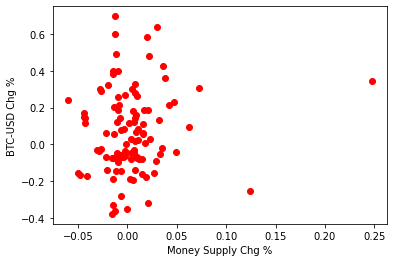

In [5]:
plt.scatter(df["BOGMAS_Chg%"],df["BTC-USD_Chg%"], color="red")
plt.xlabel("Money Supply Chg %")
plt.ylabel("BTC-USD Chg %")

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

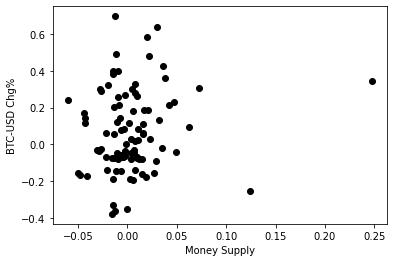

In [7]:
plt.scatter(train["BOGMAS_Chg%"], train["BTC-USD_Chg%"], color="black")
plt.xlabel("Money Supply")
plt.ylabel("BTC-USD Chg%")
plt.show()

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["BOGMAS_Chg%"]])
train_y = np.asanyarray(train[["BTC-USD_Chg%"]])
regr.fit(train_x, train_y)

print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")

Coefficients: [[0.84881538]]
Intercept: [0.06512447]


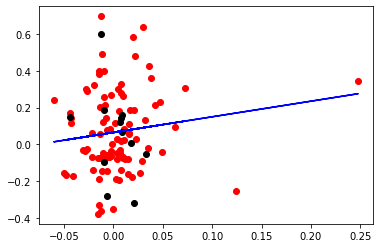

In [9]:
plt.scatter(train["BOGMAS_Chg%"], train["BTC-USD_Chg%"], color="red")
plt.scatter(test["BOGMAS_Chg%"], test["BTC-USD_Chg%"], color="black")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['BOGMAS_Chg%']])
test_y = np.asanyarray(test[['BTC-USD_Chg%']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.06
R2-score: -0.06


In [17]:
from scipy.stats import pearsonr

In [18]:
corr_coef, p_val = pearsonr(df["BOGMAS_Chg%"], df["BTC-USD_Chg%"]) 

In [20]:
print(f"correlation between money supply and BTC is: {corr_coef}")
print(f"significance of this result is {p_val}")

correlation between money supply and BTC is: 0.10828321296666125
significance of this result is 0.2738888728237238
